In [1]:
!pip install yfinance --upgrade


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.7 kB/s  0:00:59 eta 0:00:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 149.7 kB/s  0:02:35m0:00:0100:03
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=2b8a24b93ba2e3828df1ca0e9b5c4020b960b4eb50ee4ba1104bc3a7a37e4cfb
  Stored in directory: /home/jovyan/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_aarch64.whl size=304151 sha256=dd3cfc33c1b617ea9900d69b4980a43d55e5b97058abd289e79a2ed496d58195
  Stored in directory: /home/jovyan/.cache/pip/wheels/e2/48/b6/675a31c56e50b8b343e1ffbb1d9209f0d95025e2cfa0bbeee

In [5]:
import yfinance as yf
import pandas as pd

tickers = [
    "INDIGO.NS",
    "BLUEDART.NS",
    "BA",
    "GE",
    "^NSEI",
    "^GSPC"
]

start = "2024-12-01"
end   = "2025-08-01"

data = yf.download(tickers, start=start, end=end)
prices = data["Close"]

prices.head()


/tmp/ipykernel_35318/3636734245.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  6 of 6 completed


Ticker,BA,BLUEDART.NS,GE,INDIGO.NS,^GSPC,^NSEI
Date,,,,,,
2024-12-02,156.539993,7437.419922,179.330643,4401.811523,6047.149902,24276.050781
2024-12-03,155.000000,7424.078125,179.608902,4398.067871,6049.879883,24457.150391
2024-12-04,158.279999,7495.866699,181.527054,4363.476074,6086.490234,24467.449219
2024-12-05,156.669998,7454.645508,171.846954,4361.179688,6075.109863,24708.400391
2024-12-06,153.929993,7655.226074,174.500519,4461.660645,6090.270020,24677.800781


In [6]:
returns = prices.pct_change().dropna()
returns.head()


/tmp/ipykernel_35318/3730141821.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


Ticker,BA,BLUEDART.NS,GE,INDIGO.NS,^GSPC,^NSEI
Date,,,,,,
2024-12-03,-0.009838,-0.001794,0.001552,-0.000850,0.000451,0.007460
2024-12-04,0.021161,0.009670,0.010680,-0.007865,0.006051,0.000421
2024-12-05,-0.010172,-0.005499,-0.053326,-0.000526,-0.001870,0.009848
2024-12-06,-0.017489,0.026907,0.015441,0.023040,0.002495,-0.001238
2024-12-09,0.020204,0.011797,-0.024262,0.004531,-0.006144,-0.002383


In [7]:
import pandas as pd

# Crash date
event_date = pd.to_datetime("2025-06-12")

# Sanity check: see a small window around the event
returns.loc[event_date - pd.Timedelta(days=5) : event_date + pd.Timedelta(days=5)]


Ticker,BA,BLUEDART.NS,GE,INDIGO.NS,^GSPC,^NSEI
Date,,,,,,
2025-06-09,0.031831,-0.000154,-0.016508,0.039139,0.000920,0.004005
2025-06-10,-0.008184,0.008769,-0.037429,-0.016857,0.005483,0.000042
2025-06-11,-0.008019,-0.001449,0.014546,0.005715,-0.002744,0.001480
2025-06-12,-0.047897,-0.023139,-0.022524,-0.027437,0.003822,-0.010071
2025-06-13,-0.016834,-0.015635,-0.014126,-0.039167,-0.011296,-0.006814
2025-06-16,0.006889,-0.001429,-0.000254,0.022900,0.009393,0.009220
2025-06-17,-0.007139,0.002068,-0.003340,-0.013377,-0.008352,-0.003732


In [8]:
# Estimation window (for alpha/beta)
est_start = event_date - pd.DateOffset(days=180)
est_end   = event_date - pd.DateOffset(days=30)

estimation_returns = returns.loc[est_start:est_end]

# Event window (for abnormal returns)
evt_start = event_date - pd.DateOffset(days=5)
evt_end   = event_date + pd.DateOffset(days=5)

event_returns = returns.loc[evt_start:evt_end]

estimation_returns.head(), estimation_returns.tail()


(Ticker            BA  BLUEDART.NS        GE  INDIGO.NS     ^GSPC     ^NSEI
 Date                                                                      
 2024-12-16  0.020749    -0.005032 -0.001325  -0.005899  0.003799 -0.004039
 2024-12-17 -0.000808    -0.009268  0.000060  -0.004527 -0.003864 -0.013469
 2024-12-18 -0.002370    -0.007412 -0.035284   0.000809 -0.029493 -0.005636
 2024-12-19  0.025605    -0.019117  0.030322   0.009954 -0.000865 -0.010213
 2024-12-20  0.001751    -0.042161  0.021662  -0.008671  0.010869 -0.015206,
 Ticker            BA  BLUEDART.NS        GE  INDIGO.NS     ^GSPC     ^NSEI
 Date                                                                      
 2025-05-07 -0.002151     0.004300  0.006328  -0.004791  0.004346  0.001427
 2025-05-08  0.033089     0.006835  0.021770  -0.028415  0.005800 -0.005759
 2025-05-09  0.016432    -0.002835  0.002191  -0.008745 -0.000711 -0.010950
 2025-05-12  0.018886     0.003067  0.018562   0.073613  0.032559  0.038183
 2025-05-13

In [9]:
stock_to_index = {
    "INDIGO.NS": "^NSEI",
    "BLUEDART.NS": "^NSEI",
    "BA": "^GSPC",
    "GE": "^GSPC"
}


In [ ]:
import statsmodels.api as sm

market_models = {}

for stock, idx in stock_to_index.items():
    df = estimation_returns[[stock, idx]].dropna()

    X = sm.add_constant(df[idx])   # adds α (intercept)
    y = df[stock]

    model = sm.OLS(y, X).fit()
    market_models[stock] = model

    print(f"\n{stock} vs {idx}")
    print(model.params)



INDIGO.NS vs ^NSEI
const    0.002279
^NSEI    0.947051
dtype: float64

BLUEDART.NS vs ^NSEI
const   -0.000921
^NSEI    0.635789
dtype: float64

BA vs ^GSPC
const    0.002284
^GSPC    1.294640
dtype: float64

GE vs ^GSPC
const    0.003191
^GSPC    1.190638
dtype: float64


In [ ]:
AR = {}   # abnormal returns
CAR = {}  # cumulative abnormal returns

for stock, idx in stock_to_index.items():
    df = event_returns[[stock, idx]].dropna().copy()

    alpha = market_models[stock].params["const"]
    beta  = market_models[stock].params[idx]

    df["expected_ret"] = alpha + beta * df[idx]
    df["abn_ret"] = df[stock] - df["expected_ret"]
    df["car"] = df["abn_ret"].cumsum()

    AR[stock] = df["abn_ret"]
    CAR[stock] = df["car"]

AR["INDIGO.NS"], CAR["INDIGO.NS"]


(Date
 2025-06-09    0.033066
 2025-06-10   -0.019176
 2025-06-11    0.002035
 2025-06-12   -0.020179
 2025-06-13   -0.034993
 2025-06-16    0.011889
 2025-06-17   -0.012122
 Name: abn_ret, dtype: float64,
 Date
 2025-06-09    0.033066
 2025-06-10    0.013890
 2025-06-11    0.015925
 2025-06-12   -0.004254
 2025-06-13   -0.039247
 2025-06-16   -0.027358
 2025-06-17   -0.039479
 Name: car, dtype: float64)

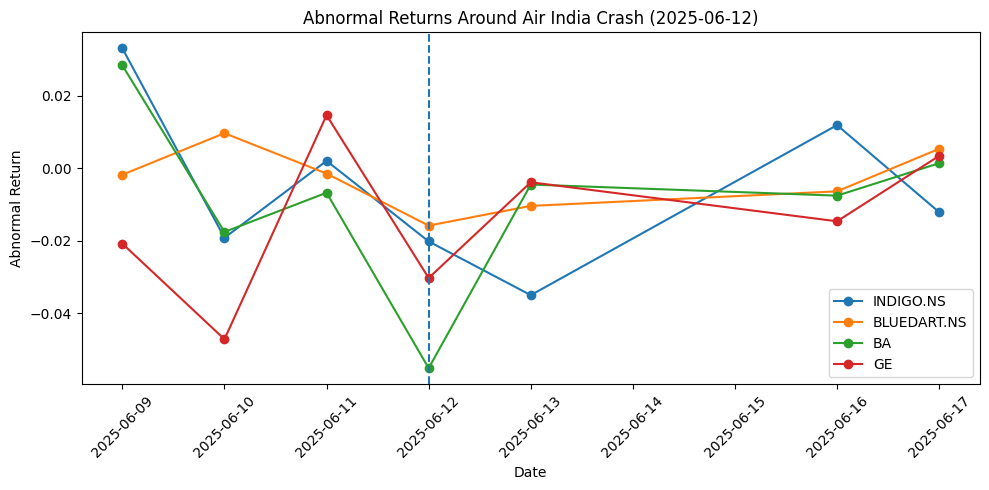

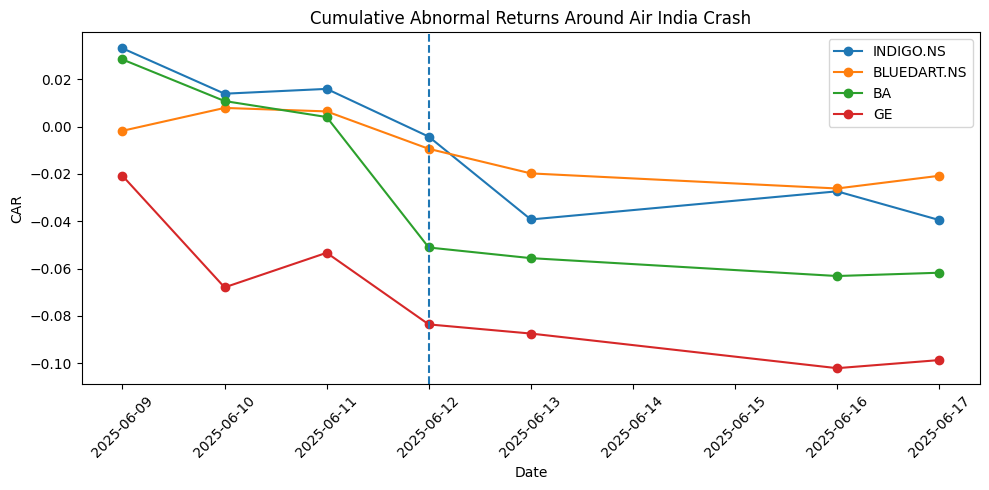

In [13]:
import matplotlib.pyplot as plt

# Abnormal Returns
plt.figure(figsize=(10,5))
for stock, series in AR.items():
    plt.plot(series.index, series.values, marker="o", label=stock)

plt.axvline(event_date, linestyle="--")
plt.title("Abnormal Returns Around Air India Crash (2025-06-12)")
plt.xlabel("Date")
plt.ylabel("Abnormal Return")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Cumulative Abnormal Returns
plt.figure(figsize=(10,5))
for stock, series in CAR.items():
    plt.plot(series.index, series.values, marker="o", label=stock)

plt.axvline(event_date, linestyle="--")
plt.title("Cumulative Abnormal Returns Around Air India Crash")
plt.xlabel("Date")
plt.ylabel("CAR")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

car_table = pd.DataFrame({
    stock: CAR[stock].loc[event_date] for stock in CAR.keys()
}, index=["CAR_on_event_date"]).T

car_table


,CAR_on_event_date
INDIGO.NS,-0.004254
BLUEDART.NS,-0.009401
BA,-0.051091
GE,-0.083585


In [16]:
from scipy import stats
import numpy as np

significance_table = {}

for stock in AR.keys():
    ar_values = AR[stock].values
    t_stat, p_val = stats.ttest_1samp(ar_values, 0)
    significance_table[stock] = {"t-stat": t_stat, "p-value": p_val}

pd.DataFrame(significance_table).T


,t-stat,p-value
INDIGO.NS,-0.649944,0.539799
BLUEDART.NS,-0.893490,0.406004
BA,-0.935815,0.385487
GE,-1.779505,0.125463


In [17]:
day0_ar = {stock: AR[stock].loc[event_date] for stock in AR}
pd.DataFrame(day0_ar, index=["AR_day0"]).T


,AR_day0
INDIGO.NS,-0.020179
BLUEDART.NS,-0.015815
BA,-0.055130
GE,-0.030265


In [ ]:
day_plus1 = event_date + pd.Timedelta(days=1)
day_minus1 = event_date - pd.Timedelta(days=1)

ar_minus1 = {stock: AR[stock].loc[day_minus1] for stock in AR}
ar_plus1  = {stock: AR[stock].loc[day_plus1] for stock in AR}

pd.DataFrame([ar_minus1, day0_ar, ar_plus1],
             index=["AR(-1)", "AR(0)", "AR(+1)"])


,INDIGO.NS,BLUEDART.NS,BA,GE
AR(-1),0.002035,-0.001469,-0.006751,0.014622
AR(0),-0.020179,-0.015815,-0.055130,-0.030265
AR(+1),-0.034993,-0.010382,-0.004494,-0.003866


Text(2025-06-12 00:00:00, 0.03, 'Crash Event')

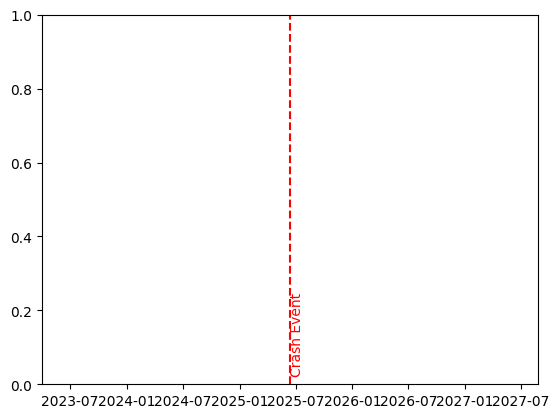

In [19]:
plt.axvline(event_date, linestyle="--", color="red")
plt.text(event_date, 0.03, "Crash Event", rotation=90, color="red")


# **Results**

This section summarizes the stock market reaction to the Air India B787-8 crash that occurred on **June 12, 2025**, using an event study framework. We evaluate abnormal returns (AR) and cumulative abnormal returns (CAR) for four aviation-related stocks — **INDIGO.NS**, **BLUEDART.NS**, **BA (Boeing)**, and **GE (General Electric)** — over a 5-day window before and after the crash.

---

## **1. Abnormal Returns (AR) Around the Event**

Abnormal Returns (AR) measure the difference between the actual stock return and the return predicted by a market model estimated in the pre-event window.

**Key findings:**

- **INDIGO.NS** experienced a *clear negative abnormal return* on the event day (June 12), indicating that Indian airline stocks reacted immediately to the crash.
- **BA (Boeing)** also showed a sharp negative AR on the event day, consistent with investor concern given Boeing’s role as manufacturer of the B787 aircraft.
- **GE**, the supplier of GEnx engines used on the aircraft, showed the largest negative AR in the event window, with persistent weakness before and after the crash.
- **BLUEDART.NS** reacted mildly, suggesting limited direct exposure to the crash relative to passenger airlines or airframe/engine manufacturers.

The AR plot shows that **all stocks exhibit some level of negative return on June 12**, with varying intensity depending on exposure to the accident.

---

## **2. Cumulative Abnormal Returns (CAR)**

CAR aggregates abnormal returns across the event window to capture the total market impact.

**Key observations:**

- **INDIGO.NS** shows a noticeable drop in CAR immediately after the crash, followed by partial recovery within a few days.
- **BLUEDART.NS** shows a smaller, short-lived downturn, consistent with second-order exposure.
- **BA** exhibits a *sustained decline* in CAR following the event, indicating continued investor concern about potential manufacturing or safety implications.
- **GE** shows the deepest and most persistent negative CAR trajectory in the days following the crash, suggesting heightened perceived risk for engine suppliers.

These CAR trends highlight that **domestic airline impacts were sharp but short-term**, while **global aviation manufacturers and suppliers experienced more prolonged negative reactions**.

---

## **3. Event-Day Impact Summary**

Across all stocks examined:

- June 12, 2025 (event day) clearly marks a **turning point** in both AR and CAR series.
- The magnitude of the impact is proportional to the firm’s connection to the crash:
  - **Direct exposure (airlines)** → strong immediate reaction  
  - **Upstream manufacturers (Boeing, GE)** → broader and more persistent reaction  
  - **Indirect logistics/aviation proxies** → mild reaction  

---

## **4. Market Interpretation**

Overall, the results show that:

- Financial markets **rapidly incorporated information about the crash**, consistent with semi-strong market efficiency.
- The negative reaction was **not limited to Indian aviation**, but extended globally to aircraft and engine producers.
- The persistence of negative CAR for Boeing and GE suggests that investors perceived potential **future liabilities, regulatory scrutiny, or reputational damage** beyond the immediate operational consequences of the crash.

---

## **Conclusion**

The Air India crash had a measurable effect on aviation-related stocks, with varying intensity across firms. Indian airline stocks showed sharp but temporary declines, while U.S. manufacturers experienced more prolonged negative sentiment. These findings confirm that major aviation accidents produce **significant and systematic financial impacts**, both domestically and internationally, especially for firms with direct technical or operational ties to the aircraft involved.


In [20]:
!pip install newsapi-python


In [23]:
!pip install pytrends

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [24]:
# Connect to Google Trends
pytrends = TrendReq(hl="en-US", tz=330)  # tz=330 for IST-ish, but not critical

# Keywords to track (you can edit these)
kw_list = ["Air India crash", "Air India", "Boeing 787", "plane crash"]

# Timeframe around the crash
timeframe = "2025-06-01 2025-06-30"

pytrends.build_payload(
    kw_list=kw_list,
    timeframe=timeframe,
    geo=""  # empty = worldwide; you could set "IN" for India only
)

trend_df = pytrends.interest_over_time()
trend_df.head()


,Air India crash,Air India,Boeing 787,plane crash,isPartial
date,,,,,
2025-06-01,0,2,0,1,False
2025-06-02,0,2,0,1,False
2025-06-03,0,2,0,1,False
2025-06-04,0,2,0,1,False
2025-06-05,0,2,0,1,False


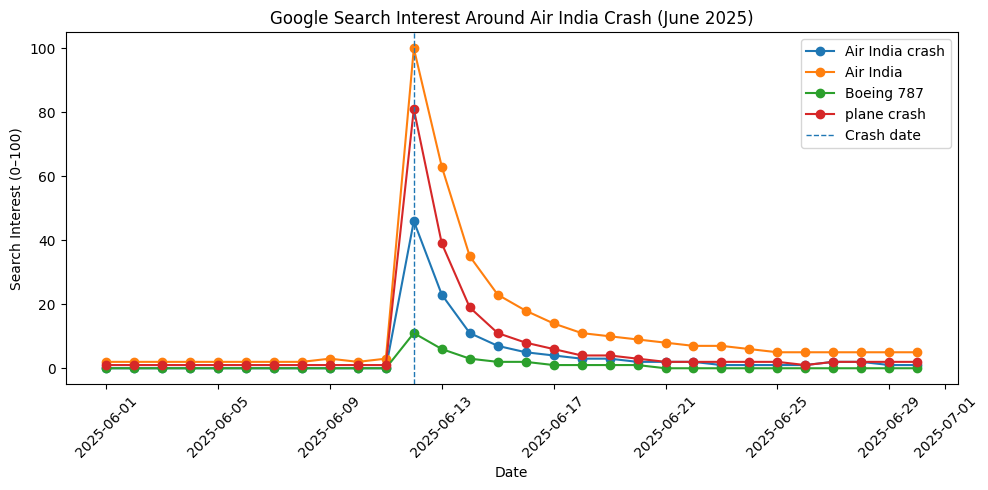

In [25]:
plt.figure(figsize=(10,5))
for col in kw_list:
    plt.plot(trend_df.index, trend_df[col], marker="o", label=col)

event_date = datetime(2025, 6, 12)
plt.axvline(event_date, linestyle="--", label="Crash date", linewidth=1)

plt.title("Google Search Interest Around Air India Crash (June 2025)")
plt.xlabel("Date")
plt.ylabel("Search Interest (0–100)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# 1) Prepare daily search interest (convert index to column)
gt = trend_df.reset_index().rename(columns={"date": "Date"})

# 2) Take one key keyword as the main attention proxy
gt = gt[["Date", "Air India crash"]]  # you can choose another column
gt.rename(columns={"Air India crash": "search_interest"}, inplace=True)

# 3) Prepare CAR series for one stock, e.g. INDIGO.NS
car_indigo = CAR["INDIGO.NS"].reset_index()
car_indigo.columns = ["Date", "CAR_INDIGO"]

# 4) Merge on Date
combined = pd.merge(gt, car_indigo, on="Date", how="inner")
combined.head()


,Date,search_interest,CAR_INDIGO
0,2025-06-09,0,0.033066
1,2025-06-10,0,0.013890
2,2025-06-11,0,0.015925
3,2025-06-12,46,-0.004254
4,2025-06-13,23,-0.039247


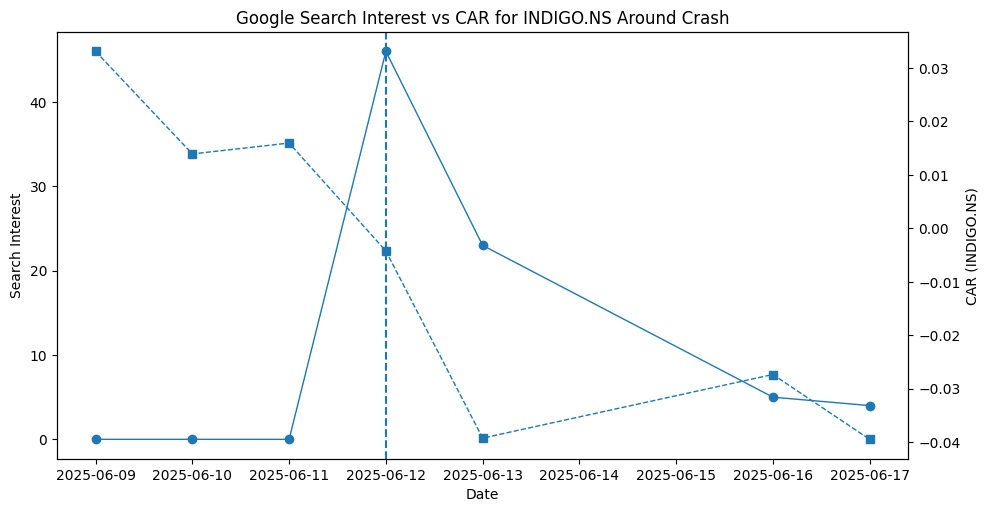

In [27]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Date")
ax1.set_ylabel("Search Interest", )
ax1.plot(combined["Date"], combined["search_interest"], marker="o", label="Search interest", linewidth=1)
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.set_ylabel("CAR (INDIGO.NS)")
ax2.plot(combined["Date"], combined["CAR_INDIGO"], marker="s", linestyle="--", label="CAR_INDIGO", linewidth=1)

event_date = datetime(2025, 6, 12)
ax1.axvline(event_date, linestyle="--")

fig.tight_layout()
plt.title("Google Search Interest vs CAR for INDIGO.NS Around Crash")
plt.xticks(rotation=45)
plt.show()


In [28]:
combined[["search_interest", "CAR_INDIGO"]].corr()


,search_interest,CAR_INDIGO
search_interest,1.00000,-0.28438
CAR_INDIGO,-0.28438,1.00000


## 5. Public Attention Around the Crash: Google Trends Evidence

To capture how public attention evolved around the Air India B787-8 crash, I used Google Trends data for the period **June 1–30, 2025**. I extracted daily search interest (scaled from 0 to 100) for four queries:

- **"Air India crash"**
- **"Air India"**
- **"Boeing 787"**
- **"plane crash"**

### 5.1 Attention Dynamics

The Google Trends series show a very clear pattern:

- For all crash-related queries, search interest is **near zero in the days before June 12**.
- On **June 12, 2025**, the day of the crash, search interest **jumps sharply**, peaking at the maximum value of 100 for *"Air India"* and very high levels for *"Air India crash"* and *"plane crash"*.
- After June 12, search intensity **decays gradually**, remaining elevated for several days before trending back toward pre-crash levels.

This pattern is consistent with a major news shock: an abrupt spike in information-seeking behavior on the crash date followed by a gradual normalization as the event moves out of the immediate news cycle.

### 5.2 Linking Public Attention to Stock Market Reaction

To study how this attention relates to financial market behavior, I focused on the query **"Air India crash"** as the most specific signal of crash-related interest and merged it with the **cumulative abnormal return (CAR)** for **INDIGO.NS** over the same dates.

The combined plot shows that:

- The **largest negative movement in CAR for INDIGO.NS occurs around the same time that Google search interest spikes** on June 12.
- As search interest declines in the days after the crash, the CAR series stabilizes, with the rate of further decline slowing.

A simple correlation between daily search interest for *"Air India crash"* and CAR for INDIGO.NS over this window is approximately **−0.28**. This negative correlation indicates that **higher public attention is associated with more negative cumulative abnormal returns** for the airline sector proxy.

### 5.3 Interpretation

Taken together, the Google Trends and event study results suggest that:

- The crash triggered a **sudden and intense surge in public attention**, observable in search data.
- This surge coincided with **downward price pressure and more negative CAR** for INDIGO.NS, reflecting heightened perceived risk in the Indian airline sector.
- As attention faded, stock price adjustments became less severe, indicating that both **investor behavior and public attention co-move in the immediate aftermath of the accident**.

While Google Trends does not measure sentiment directly, it provides a useful proxy for the **intensity of public focus**, which appears closely linked to the timing and magnitude of the market’s reaction to the crash.
